In [4]:
!pip install wordcloud
!pip install ktrain

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.4 kB 165.2 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 281.8 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/301.4 kB 656.4 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/301.4 kB 908.0 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
     --------------------------------------- 0.0/25.3 MB 660.6 kB/s eta 0:00:39
     --------------------------------------- 0.1/25.3 MB 469.7 kB/s eta 0:00:54
     --------------------------------------- 0.1/25.3 MB 722.1 kB/s eta 0

In [8]:
!pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------------- ------ 41.0/48.7 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 818.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.2 MB 2.4 MB/s eta 0:02:41
   ---------------------------------------- 0.3/385.2 MB 2.9 MB/s eta 0:02:11
   ---------------------------------------- 0.4/385.2 MB 3.0 MB/s eta 0:02:07
   ---------------------------------------- 0.4/385.2 MB 3.0 MB/s eta 0:02:07
   ---------------------------------------- 0.4/385.2 MB 1.7 MB/s eta 0:03:52
   ---------------------------------------- 0.8/385.2 MB 2.9 MB/s eta 0:02:12
   ---------------------------------------- 0.8/385.2 MB 2.9 MB/s eta 0:02:12
   ---------------------------------------- 0.8/385.2 MB 2.2 MB/s eta 0:02:52
   ---------------------------------------- 1.2/385.2 MB 3.0 MB/s eta 0:0

In [3]:
import pandas as pd
import numpy as np

import re
import string
import os

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

plt.style.use('ggplot')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
tweet = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-disaster-prediction-dataset/master/train.csv')

In [3]:
tweet

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
tweet["target"].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [6]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\baskc\appdata\local\temp\pip-req-build-_alyjicb
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit e5b1f0710cb1ea5ebbc73d30abe8d45a07cbb399
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\BaskC\AppData\Local\Temp\pip-req-build-_alyjicb'


In [13]:
!pip install spacy

   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.7 MB 487.6 kB/s eta 0:00:24
   ---------------------------------------- 0.0/11.7 MB 487.6 kB/s eta 0:00:24
   ---------------------------------------- 0.0/11.7 MB 487.6 kB/s eta 0:00:24
   ---------------------------------------- 0.1/11.7 MB 272.3 kB/s eta 0:00:43
   ---------------------------------------- 0.1/11.7 MB 327.3 kB/s eta 0:00:36
   ---------------------------------------- 0.1/11.7 MB 423.5 kB/s eta 0:00:28
    --------------------------------------- 0.2/11.7 MB 523.5 kB/s eta 0:00:22
    --------------------------------------- 0.2/11.7 MB 523.5 kB/s eta 0:00:22
    --------------------------------------- 0.2/11.7 MB 471.4 kB/s eta 0:00:25
    --------------------------------------- 0.2/11.7 MB 461.0 kB/s eta 0:00:25
    --------------------------------------- 0.2/11.7 MB 461.0 kB/s eta

In [19]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 919.0 kB/s eta 0:00:14
     ---------------------------------------- 0.1/12.8 MB 1.4 MB/s eta 0:00:09
      --------------------------------------- 0.2/12.8 MB 1.2 MB/s eta 0:00:11
      --------------------------------------- 0.3/12.8 MB 1.3 MB/s eta 0:00:10
      --------------------------------------- 0.3/12.8 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.4/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.4/12.8 MB 1.1 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 1.2 MB/s eta 0:00:10
     -- ------------------------------------- 0.6/12.8 MB 1.2 MB/

In [21]:
import spacy
# spaCy ile temizleme işlemleri
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def clean_text_spacy(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(tokens)

In [23]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 20.5/626.3 kB 320.0 kB/s eta 0:00:02
   - ------------------------------------- 30.7/626.3 kB 325.1 kB/s eta 0:00:02
   - ------------------------------------- 30.7/626.3 kB 325.1 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/626.3 kB 178.6 kB/s eta 0:00:04
   --- ----------------------------------- 61.4/626.3 kB 217.9 kB/s eta 0:00:03
   ----- --------------------------------- 92.2/626.3 kB 275.8 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 297.7 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 297.7 kB/s eta 0:00:02
   -------- ----------------------------- 133.1/626.3 kB 291.2 kB/s eta 0:00:02
   ---------- --------------------------- 174.1/626.3 kB 349.3 kB/s eta 0:00:02
   ------------ ------------------------- 204.8/626.3 kB 

In [24]:
import preprocess_kgptalkie as kgp

In [27]:
tweet = kgp.get_basic_features(tweet)

In [29]:
tweet

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,73,11,6.636364,2,0,0,2,0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,106,20,5.300000,9,0,2,2,0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,58,8,7.250000,1,0,0,7,2
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,119,19,6.263158,6,0,0,2,0


In [31]:
def get_clean(x):
    x = str(x).lower().replace('\\', ' ').replace('_', ' ').replace('.', ' ')
    x = kgp.cont_exp(x)
    x = kgp.remove_emails(x)
    x = kgp.remove_urls(x)
    x = kgp.remove_html_tags(x)
    x = kgp.remove_rt(x)
    x = kgp.remove_accented_chars(x)
    x = kgp.remove_special_chars(x)
    x = kgp.remove_dups_char(x)
    return x

In [33]:
tweet['text'] = tweet['text'].apply(lambda x: get_clean(x))

D:\Anaconda\Lib\site-packages\preprocess_kgptalkie\utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


In [34]:
tweet.head()['text']

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    130 people receive wildfires evacuation orders...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [43]:
real = kgp.get_word_freqs(tweet[tweet['target']==1], 'text')
real = ' '.join(real.index)
real

'httpt the in of a to and is on for i at by from it that with not you after this fire are was as have my news httpst over up more via disaster an were be people california suicide has no police who but when been killed like do 2 will just hiroshima than so out fires storm crash families we train now about into emergency s your buildings bomb there all what two mh370 attack am nuclear they wildfire video accident get new one bombing how prime minister northern burning legionnaires dead me bomber homes some if car war still atomic obama he fatal years off may us collapse forest retweet city watch debris malaysia first today 1 japan or man latest mass severe near water had earthquake before those confirmed found oil would down 70 spill floods army world home under warning 4 could injured wreckage weather derailment outbreak 3 evacuation being saudi thunderstorm migrants 40 our old flood missing flooding can during say investigators their time bridge back mosque death suspect state her cha

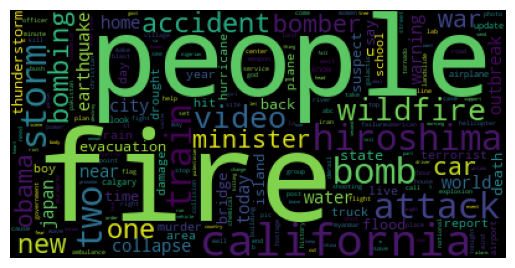

In [45]:
word_cloud = WordCloud(max_font_size=100).generate(real)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

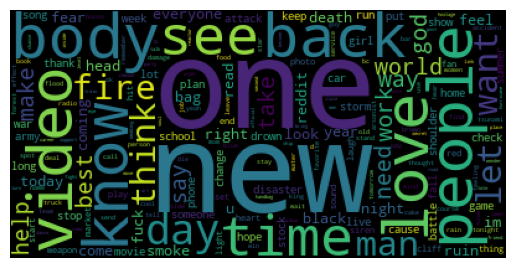

In [47]:
# not real plot

nreal = kgp.get_word_freqs(tweet[tweet['target']==0], 'text')
nreal = ' '.join(nreal.index)
word_cloud = WordCloud(max_font_size=100).generate(nreal)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

## LINEAR SVC WITH TFIDF VECTORIZER

In [49]:
text = tweet['text']
y = tweet['target']

In [51]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

In [58]:
X.shape

(7613, 22545)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [72]:
def run_SVM(clf, X_train, X_test, y_train, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print()
  print('Classification Report')
  print(classification_report(y_test, y_pred))

In [74]:
from sklearn.svm import LinearSVC

In [76]:
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       869
           1       0.83      0.69      0.75       654

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



D:\Anaconda\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [81]:
tweet["text"]

0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3       130 people receive wildfires evacuation orders...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    aria ahrary thetawniest the out of control wil...
7610    m1 94 0104 coordinated universal time5km s of ...
7611    police investigating after an ebike collided w...
7612    the latest more homes razed by northern califo...
Name: text, Length: 7613, dtype: object

In [83]:
sentences = tweet['text'].apply(lambda x: x.lower().split()).tolist()

In [89]:
!python -m spacy download en_core_web_lg

     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     -------------------------------------- 0.1/587.7 MB 812.7 kB/s eta 0:12:04
     -------------------------------------- 0.1/587.7 MB 819.2 kB/s eta 0:11:58
     ---------------------------------------- 0.2/587.7 MB 1.1 MB/s eta 0:09:09
     ---------------------------------------- 0.3/587.7 MB 1.2 MB/s eta 0:08:04
     ---------------------------------------- 0.4/587.7 MB 1.2 MB/s eta 0:07:56
     ---------------------------------------- 0.4/587.7 MB 1.4 MB/s eta 0:07:08
     ---------------------------------------- 0.5/587.7 MB 1.5 MB/s eta 0:06:37
     ---------------------------------------- 0.6/587.7 MB 1.5 MB/s eta 0:06:31
     ---------------------------------------- 0.8/587.7 MB 1.6 MB/s eta 0:06:04
     ---------------------------------------- 0.9/587.7 MB 1.7 MB/s eta 0:05:46
     ---------------------------------------- 1.0/587.

In [90]:
import en_core_web_lg

In [91]:
nlp = en_core_web_lg.load()

In [92]:
x = 'cat dog'
doc = nlp(x)

In [93]:
doc.vector.shape

(300,)

In [94]:
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [95]:
tweet['vec'] = tweet['text'].apply(lambda x: get_vec(x))

In [107]:
tweet['vec'].iloc[0].shape

(300,)

In [119]:
tweet['vec']

0       [-0.8476947, 0.8888447, -3.10391, 0.090650745,...
1       [-0.35491997, -1.5415528, -2.0926642, -0.49523...
2       [-2.8959212, 0.6998072, -2.5640087, 1.2561336,...
3       [-2.3889112, -0.6061475, -2.453201, 1.5150287,...
4       [-0.8628482, -0.2587669, -2.5594664, 0.3031685...
                              ...                        
7608    [-2.165575, 0.3668525, -2.496375, 0.97179675, ...
7609    [-2.682941, 0.34250003, -1.4142996, 1.6739544,...
7610    [-1.8915609, 0.027770612, -2.1715724, -1.45669...
7611    [-0.59628004, 0.87019014, -1.2978636, -0.15107...
7612    [-1.2928246, -0.70155996, -2.2293684, 0.064314...
Name: vec, Length: 7613, dtype: object

In [121]:
X = tweet['vec'].to_numpy()
X = X.reshape(-1, 1)
X = np.concatenate(np.concatenate(X, axis=0), axis=0).reshape(-1, 300)

In [123]:
X.shape

(7613, 300)

In [125]:
y = tweet['target']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [129]:
%%time
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)

D:\Anaconda\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



Classification Report
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       869
           1       0.72      0.80      0.76       654

    accuracy                           0.78      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.79      0.78      0.78      1523

CPU times: total: 2.94 s
Wall time: 8.66 s


D:\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [131]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 

In [135]:
token = Tokenizer()
token.fit_on_texts(text)

In [137]:
token.word_index

{'httpt': 1,
 'the': 2,
 'a': 3,
 'in': 4,
 'to': 5,
 'of': 6,
 'i': 7,
 'and': 8,
 'is': 9,
 'you': 10,
 'for': 11,
 'on': 12,
 'it': 13,
 'my': 14,
 'not': 15,
 'that': 16,
 'with': 17,
 'at': 18,
 'by': 19,
 'this': 20,
 'have': 21,
 'are': 22,
 'from': 23,
 'be': 24,
 'was': 25,
 'httpst': 26,
 'do': 27,
 'like': 28,
 'as': 29,
 'out': 30,
 'am': 31,
 'so': 32,
 'your': 33,
 'up': 34,
 'me': 35,
 'just': 36,
 'but': 37,
 'will': 38,
 'after': 39,
 'has': 40,
 'all': 41,
 'no': 42,
 'fire': 43,
 'an': 44,
 'when': 45,
 'if': 46,
 'he': 47,
 'new': 48,
 'we': 49,
 'get': 50,
 'they': 51,
 'now': 52,
 'about': 53,
 'via': 54,
 'more': 55,
 'people': 56,
 'what': 57,
 'or': 58,
 'how': 59,
 'one': 60,
 'been': 61,
 'there': 62,
 '2': 63,
 'over': 64,
 'news': 65,
 'would': 66,
 'who': 67,
 'into': 68,
 'were': 69,
 'video': 70,
 'can': 71,
 'emergency': 72,
 'disaster': 73,
 'us': 74,
 'police': 75,
 'than': 76,
 'off': 77,
 'her': 78,
 'some': 79,
 'still': 80,
 'his': 81,
 'body': 82

In [139]:
vocab_size = len(token.word_index) + 1
vocab_size

22581

In [141]:
encoded_text = token.texts_to_sequences(text)

In [143]:
encoded_text

[[109, 4491, 22, 2, 868, 6, 20, 246, 129, 1681, 4492, 74, 41],
 [186, 43, 223, 763, 6792, 6793, 1328],
 [41,
  1682,
  1435,
  5,
  2062,
  4,
  655,
  22,
  125,
  6794,
  19,
  1683,
  42,
  438,
  253,
  58,
  2062,
  4,
  655,
  1329,
  22,
  1054],
 [2809, 56, 4493, 1330, 253, 1329, 4, 86],
 [36, 93, 1159, 20, 314, 23, 6795, 2063, 29, 261, 23, 1330, 6796, 68, 3, 189],
 [2810,
  391,
  86,
  1554,
  793,
  829,
  4,
  637,
  6797,
  534,
  5,
  1106,
  372,
  43,
  4494,
  1330],
 [224, 73, 830, 282, 1160, 831, 247, 6, 1862, 4, 6798, 999, 2344, 1555],
 [7, 31, 12, 225, 6, 2, 1863, 8, 7, 71, 103, 3, 43, 4, 2, 4495],
 [62, 9, 44, 72, 253, 1237, 52, 4, 2, 585, 832, 2, 703],
 [7, 31, 2345, 16, 2, 489, 9, 240, 5, 109, 354],
 [586, 56, 611, 23, 2, 283, 467, 32, 612],
 [833,
  613,
  2811,
  9,
  217,
  2812,
  3467,
  656,
  3,
  657,
  7,
  199,
  4,
  613,
  2811,
  57,
  31,
  7,
  301,
  27,
  57,
  31,
  7,
  301,
  27,
  6799,
  247],
 [2813, 247, 2064, 6800, 2811, 1436, 58, 1864, 

In [145]:
max_length = 40
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [147]:
X

array([[ 109, 4491,   22, ...,    0,    0,    0],
       [ 186,   43,  223, ...,    0,    0,    0],
       [  41, 1682, 1435, ...,    0,    0,    0],
       ...,
       [2709, 2295, 4483, ...,    0,    0,    0],
       [  75, 1092,   39, ...,    0,    0,    0],
       [   2,  206,   55, ...,    0,    0,    0]])

In [149]:
X.shape

(7613, 40)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [153]:
vec_size = 100

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))
model.summary()

D:\Anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [155]:
%%time
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5590 - loss: 0.6811 - val_accuracy: 0.7571 - val_loss: 0.5611
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7987 - loss: 0.4573 - val_accuracy: 0.7459 - val_loss: 0.5320
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8740 - loss: 0.3220 - val_accuracy: 0.7393 - val_loss: 0.5645
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9252 - loss: 0.2225 - val_accuracy: 0.7413 - val_loss: 0.6011
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9509 - loss: 0.1619 - val_accuracy: 0.7321 - val_loss: 0.6909
CPU times: total: 31.9 s
Wall time: 33.4 s


In [157]:
def get_encoded(x):
  x = get_clean(x)
  x = token.texts_to_sequences([x])
  x = pad_sequences(x, maxlen=max_length, padding='post')
  return x

In [159]:
x = 'i am thrilled to see this'
vec = get_encoded(x)

In [161]:
vec

array([[  7,  31,   5, 103,  20,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0]])

In [165]:
model.predict(vec)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[0.1597897]], dtype=float32)

In [278]:
pip install tf_keras

  Using cached tensorflow-2.16.2-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.16.2-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflow-2.16.2-cp312-cp312-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.16.2-cp312-cp312-win_amd64.whl (377.1 MB)
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.17.0
    Uninstalling tensorflow-intel-2.17.0:
      Successfully uninstalled tensorflow-intel-2.17.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
Note: you may need to restart th

In [5]:
!export TF_USE_LEGACY_KERAS=True


'export' is not recognized as an internal or external command,
operable program or batch file.


In [286]:
pip install export

Note: you may need to restart the kernel to use updated packages.


In [6]:
X=tweet["text"]
y=tweet["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
from transformers import BertTokenizer

# BERT tokenizer'ı yükleme
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizer fonksiyonu
def tokenize_data(text_list):
    return tokenizer(
        text_list,
        padding=True,
        truncation=True,
        return_tensors='tf',
        max_length=128
    )

# Eğitim ve test setlerini tokenize etme
train_encodings = tokenize_data(X_train.tolist())
test_encodings = tokenize_data(X_test.tolist())

In [8]:
import tensorflow as tf

# TensorFlow Dataset oluşturma
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train.values
)).shuffle(10000).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test.values
)).batch(16)


In [9]:
from transformers import TFBertForSequenceClassification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Optimizer ve loss fonksiyonu tanımlama
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


AttributeError: 'Variable' object has no attribute '_distribute_strategy'

In [ ]:
# Modeli eğitme
history = model.fit(train_dataset, epochs=3, validation_data=test_dataset)

# Modeli değerlendirme
loss, accuracy = model.evaluate(test_dataset)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
